<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#简介" data-toc-modified-id="简介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>简介</a></span></li><li><span><a href="#OpenCV中最常用的特征检测和提取算法" data-toc-modified-id="OpenCV中最常用的特征检测和提取算法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OpenCV中最常用的特征检测和提取算法</a></span></li><li><span><a href="#特征定义" data-toc-modified-id="特征定义-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>特征定义</a></span></li><li><span><a href="#Harris角点检测" data-toc-modified-id="Harris角点检测-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Harris角点检测</a></span></li><li><span><a href="#SIFT(Scale-Invariant-Feature-Transform)-尺度不变特征变换" data-toc-modified-id="SIFT(Scale-Invariant-Feature-Transform)-尺度不变特征变换-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SIFT(Scale-Invariant Feature Transform) 尺度不变特征变换</a></span></li><li><span><a href="#SURF(Speeded-Up-Robust-Features)-加速稳健特征" data-toc-modified-id="SURF(Speeded-Up-Robust-Features)-加速稳健特征-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SURF(Speeded-Up Robust Features) 加速稳健特征</a></span></li><li><span><a href="#ORB(Oriented-FAST-and-Rotated-BRIEF)" data-toc-modified-id="ORB(Oriented-FAST-and-Rotated-BRIEF)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ORB(Oriented FAST and Rotated BRIEF)</a></span><ul class="toc-item"><li><span><a href="#FAST(Features-from-Accelerated-Segment-Test)" data-toc-modified-id="FAST(Features-from-Accelerated-Segment-Test)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>FAST(Features from Accelerated Segment Test)</a></span></li><li><span><a href="#BRIEF(Binary-Robust-Independent-Elementary-Features)" data-toc-modified-id="BRIEF(Binary-Robust-Independent-Elementary-Features)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>BRIEF(Binary Robust Independent Elementary Features)</a></span></li><li><span><a href="#Brute-Force-暴力匹配" data-toc-modified-id="Brute-Force-暴力匹配-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Brute-Force 暴力匹配</a></span></li></ul></li></ul></div>

## 简介
> OpenCV可以检测图像的主要特征，然后提取这些特征，使其成为图像描述符；这些图像特征可作为图像搜索的数据库。通过单应性(homography)来判断一个图像是否存在于另一个图像中。

## OpenCV中最常用的特征检测和提取算法
> * Harris: 该算法用于检测角点
> * SIFT: 该算法用于检测斑点(blob)
> * SURF: 该算法用于检测斑点
> * FAST: 该算法用于检测角点
> * BRIEF: 该算法用于检测斑点
> * ORB: 该算法代表带方向的`FAST`算法与具有旋转不变性的`BRIEF`算法通过以下方式进行特征匹配：
>> * 暴力(Brute-Force)匹配法
>> * 基于FLANN的匹配法

## 特征定义
> 特征就是有意义的图像区域，该区域具有独特性或易于识别性。因此角点及高密度区域是很好的特征，而大量重复的模式或低密度区域则部署好的特征  

> 边缘可以将图像分成两个区域，因此可以看作好的特征；斑点(与周围有很大差别的图像区域)也是有意义的特征。大多数特征检测算法都会涉及图像的角点，边和斑点的识别

## Harris角点检测

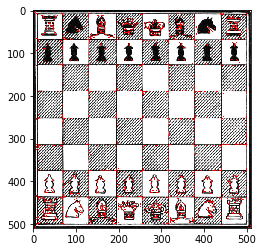

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/chess_board.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
# ksize参数指定了Sobel算子的核(kernel)，Sobel算子通过对图像行，列的变化来检测边缘；
# 该参数定义了角点检测的敏感度，其取值必须介于 3 和 31 之间的奇数
dst = cv2.cornerHarris(gray, 2, 23, 0.04)

# Harris角点检测的结果是一个由角点分数构成的灰度图像。
# 选取适当的阈值对结果图像进行二值化就检测到了图像中的角点
img[dst > 0.01 * dst.max()] = [255, 0, 0]

plt.imshow(img)

## SIFT(Scale-Invariant Feature Transform) 尺度不变特征变换

> SIFT 会对不同的图像尺度(尺度不变特征变换)输出相同的结果

> SIFT 并不检测关键点(关键点由 Difference of Gaussians 检测)，但 SIFT 会通过一个特征向量来描述关键点周围区域的情况

> DoG 是对同一图像使用不同高斯滤波器所得到的结果，DoG操作的最终结果会得到感兴趣的区域(关键点)

> 关键点有如下常用属性：
>> * pt: 表示图像中关键点的 x 坐标和 y 坐标
>> * size: 表示特征的直径
>> * angle: 表示特征的方向
>> * response: 表示关键点的强度
>> * octave: 表示特征所在金字塔的层级

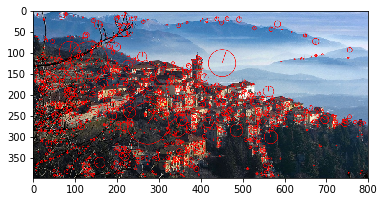

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/varese.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT对象会使用DoG检测关键点，并且对每个关键点周围的区域计算特征向量
sift = cv2.xfeatures2d.SIFT_create()
# 由方法的名称可知需要执行两个主要操作: 检测 & 计算
# 操作的返回值是关键点信息(关键点)和描述符
keypoints, descriptor = sift.detectAndCompute(gray, None)

# drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
img = cv2.drawKeypoints(image=img, outImage=img, keypoints=keypoints, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 0, 255))

# matplotlib使用的颜色模式是流行的RGB模式，而opencv使用的是BGR模式，即RGB的倒序模式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## SURF(Speeded-Up Robust Features) 加速稳健特征
> SURF 算法比 SIFT 快好几倍，它吸收了 SIFT 算法的思想
>> SIFT 和 SURF 都受专利保护，因此，被归到OpenCV的`xfeatures2d`模块中

> SURF 采用快速`Hessian`算法检测关键点，而`SURF`会提取特征 (SIFT分别采用`DoG`和`SIFT`来检测关键点并提取关键点周围的特征)

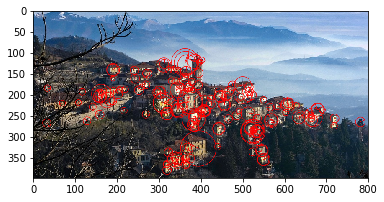

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("img/varese.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 指定Hessian阀值为8000; 阀值越高, 能识别的特征越少
# 因此可以采用试探法来得到最优检测结果
surf = cv2.xfeatures2d.SURF_create(8000)
# 由方法的名称可知需要执行两个主要操作: 检测 & 计算
# 操作的返回值是关键点信息(关键点)和描述符
keypoints, descriptor = surf.detectAndCompute(gray, None)

# drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
img = cv2.drawKeypoints(image=img, outImage=img, keypoints=keypoints, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 0, 255))

# matplotlib使用的颜色模式是流行的RGB模式，而opencv使用的是BGR模式，即RGB的倒序模式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## ORB(Oriented FAST and Rotated BRIEF)
>* ORB是用来替代`SIFT`和`SURF`的，ORB有更快的速度
>* ORB将基于`FAST`关键点检测的技术和基于`BRIEF`描述符的技术相结合

### FAST(Features from Accelerated Segment Test)
> 该算法会在像素周围绘制一个圆，该圆包括16个像素；FAST会将每个像素与加上一个阀值的圆心像素值进行比较，若有连续、比加上一个阀值的圆心的像素值还亮或暗的像素，则可认为圆心是角点

> FAST方法与阀值紧密相关，这就要求开发人员输入参数（SIFT不需要这样的输入）

### BRIEF(Binary Robust Independent Elementary Features)
> 该算法并不是特征检测算法，它只是一个描述符

> BRIEF是目前最快的描述符，其理论相当复杂

>> 什么是描述符？  
关键点描述符是图像的一种表示，可以通过比较两个图像的关键点描述符，找到它们的共同之处；所以，描述符可以作为特征匹配的一种方法

### Brute-Force 暴力匹配
> 暴力匹配方法是一种描述符匹配方法，该方法会比较两个描述符，并产生匹配结果的列表

> 称为暴力匹配的原因是该算法基本上不涉及优化，第一个描述符的所有特征都用来和第二个描述符的特征进行比较；每次比较都会给出一个距离值，而最好的比较结果会被认为是一个匹配

### ORB特征匹配
> ORB旨在优化和加快操作速度，以旋转感知(rotation-aware)的方式使用BRIEF，这样即使在训练图像与查询图像之间旋转差别很大的情况下也能够提高匹配效果

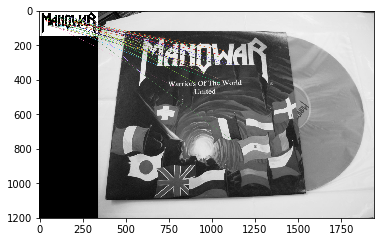

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('img/manowar_logo.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img/manowar_single.jpg', cv2.IMREAD_GRAYSCALE)

# 创建ORB特征检测器
orb = cv2.ORB_create()
# 对查询图像和训练图像进行检测，计算关键点和描述符
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 遍历描述符，计算匹配质量(距离)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
# 根据匹配质量(距离)进行排序
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:40], img2, flags=2)
plt.imshow(img3)